# Assignment #9


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib qt

## Part I - DBSCAN from "scratch"

In this problem you'll implement your own version of DBSCAN, and test it on some data.
Do NOT use sklearn's DBSCAN implementation.
You MAY use sklearn.cluster.AgglomerativeClustering (w/ single linkage) 
I will give 50 points extra credit on this assignment if you write it all "from scratch" - but you'll have to
go over your solution with me.

In [2]:
from sklearn.cluster import AgglomerativeClustering
def calculate_distances(X):
    n_samples = X.shape[0]
    distances = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            distances[i, j] = np.linalg.norm(X[i] - X[j])
            distances[j, i] = distances[i, j]
    return distances

def my_DBSCAN(X, eps, min_samples):
    dist_matrix = calculate_distances(X)
    model = AgglomerativeClustering(n_clusters=None, distance_threshold=eps*7, linkage='single')
    cluster_labels = model.fit_predict(dist_matrix)
    noise_points = np.where(np.sum(dist_matrix <= eps, axis=1) < min_samples)[0]
    cluster_labels[noise_points] = -1

    return cluster_labels

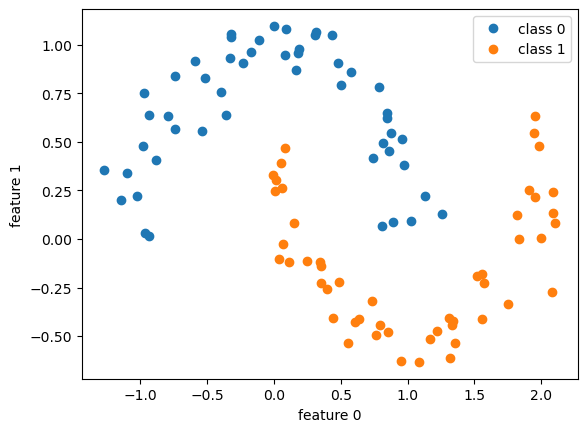

In [3]:
# We'll use sklearn's moon dataset to test it
import sklearn
from sklearn import cluster, datasets

X,y = datasets.make_moons(n_samples=100, noise=0.1, random_state=10)
num_classes = 2

# plot the data, showing the classes in different colors
plt.figure()
for c in range(2):
    inds = np.where(y == c)[0]
    plt.plot(X[inds,0],X[inds,1],'o')
plt.xlabel('feature 0')
plt.ylabel('feature 1')
plt.legend(('class 0','class 1'))

Cluster memberships:
[ 0  0  0  0  4  2  7  0  0  4  2  2  4  9  1  4  1  0  4  0  1  4  9  0
  7  9  0  4  3  4  0  0  8  9  0  0  0  2  3  0  0  0  8  4  0  7  0  4
  7  3 -1  1  1  1  0  3  1  8  4  4  0  0  1  1  0  0  1  4  0  4  3  7
  0  7  0  3  4  7  8  9  0  7  7  0  4  9  3  0  0  0  2  4  3  0  1 -1
  0  4  0  3]


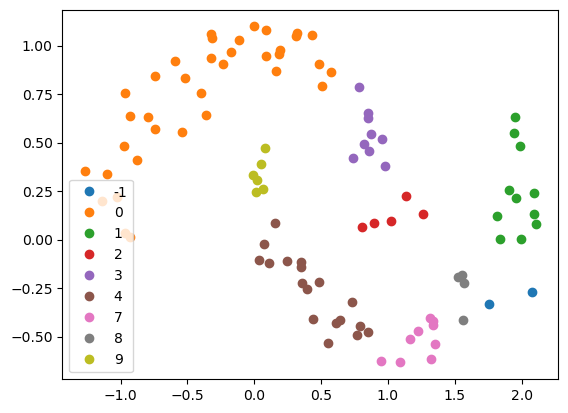

In [4]:
# Test your DBSCAN on the data, w/ eps = 0.20 and min_samples = 2
eps = 0.20
min_samples = 2
clusters = my_DBSCAN(X,eps,min_samples)

print(f"Cluster memberships:\n{clusters}")
plt.figure()
for cl_num in np.unique(clusters):
    inds = np.where(clusters == cl_num)[0]
    plt.plot(X[inds,0],X[inds,1],'o',label = cl_num)
    plt.title = f'eps = 0.2 min_samples = 2'
    plt.legend()


## Part I - Testing DBSCAN parameters

In this problem you'll use either your own version of DBSCAN or the sklearn version, to experiment with multiple 
settings for eps and min_samples, attempting to find settings that will reproduce the original moons classes (though the label numbers can be different).  

Cluster memberships:
[0 0 1 0 2 3 2 1 1 2 3 3 2 2 4 2 4 0 2 1 4 2 2 1 2 2 0 2 5 2 1 0 6 2 0 1 1
 3 5 1 0 0 6 2 1 2 0 2 2 5 7 4 8 8 0 5 8 6 2 2 0 0 4 4 0 0 4 2 0 2 5 2 0 2
 0 5 2 2 6 2 1 2 2 0 2 2 5 0 0 1 3 2 5 0 4 9 0 2 0 5] eps 0.2
Cluster memberships:
[ 0  0  1  0  2  3  2  1  1  2  3  3  2  2  4  2  4  0  2  1  4  2  2  1
  2  2  0  2  5  2  1  0  6  2  0  1  1  3  5  1  0  0  6  2  1  2  0  2
  2  5 -1  4  7  7  0  5  7  6  2  2  0  0  4  4  0  0  4  2  0  2  5  2
  0  2  0  5  2  2  6  2  1  2  2  0  2  2  5  0  0  1  3  2  5  0  4 -1
  0  2  0  5] eps 0.2
Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1] eps 0.2
Cluster memberships:
[0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 0
 

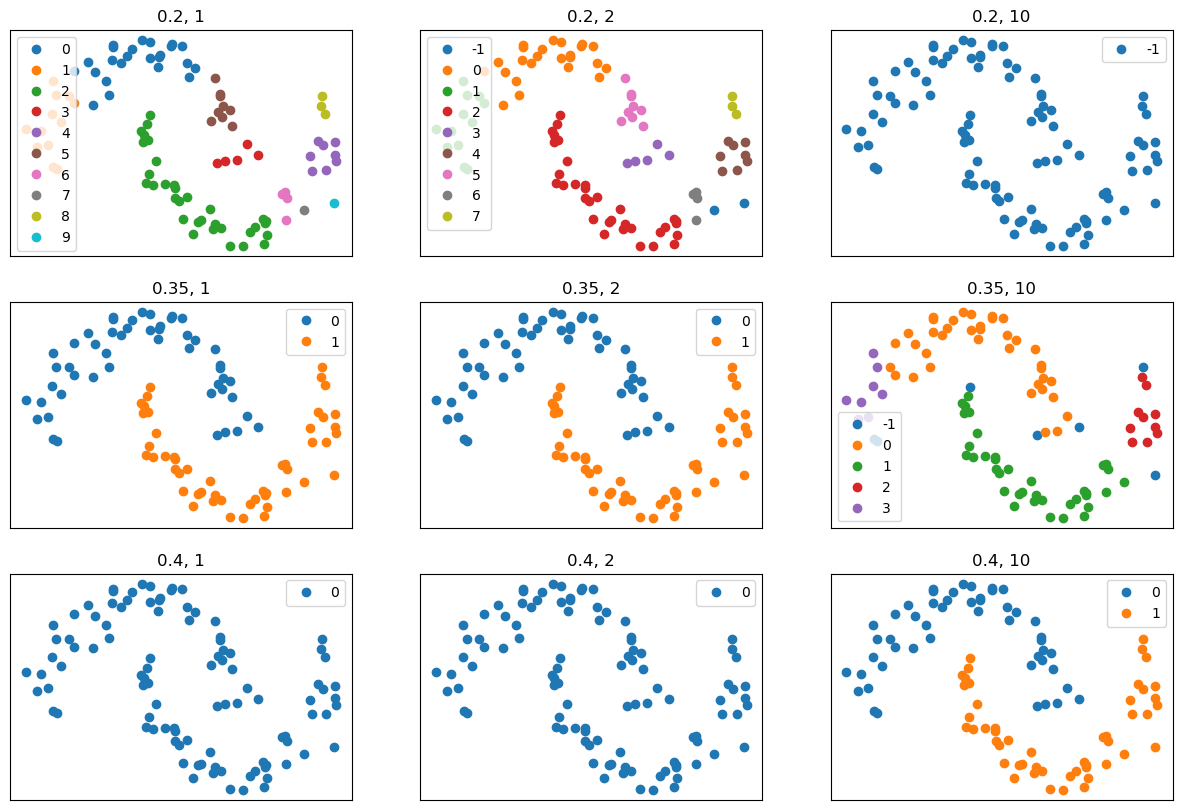

In [5]:
from sklearn.cluster import DBSCAN

eps_list = [0.2, 0.35, 0.4]
ms_list = [1, 2, 10]

fig, axes = plt.subplots(3, 3, figsize=(15, 10),subplot_kw={'xticks': (), 'yticks': ()})

for r,e in enumerate(eps_list):
    for c,ms in enumerate(ms_list):
        dbscan = DBSCAN(eps=e, min_samples=ms)
        clusters = dbscan.fit_predict(X)
        print(f"Cluster memberships:\n{clusters} eps {e}")
        for cl_num in np.unique(clusters):
            inds = np.where(clusters == cl_num)[0]
            axes[r,c].plot(X[inds,0],X[inds,1],'o',label = cl_num)
            axes[r,c].set(title = str(e) + ", " + str(ms))
            axes[r,c].legend()


It appears that 0.35, 1; 0.35, 2; 0.4, 10 reproduced the original moons. 

# Part II - One Hot Encoding

In this problem you'll implement your own basic version of one-hot encoding "from scratch", and then test it on a given column of X containing strings.  

(NOTE - the "basic" version doesn't need to include the full functionality you'd really need in practice, like maintaining continuity between initial (train) and later (test) encoding.  Here you can assume it's just used once, ever.)

In [6]:
def one_hot(col_of_X):
    unique_values, cols = np.unique(col_of_X, return_inverse=True)
    new_cols_of_X = np.zeros((len(col_of_X), len(unique_values)))
    new_cols_of_X[np.arange(len(col_of_X)), cols] = 1
    return new_cols_of_X

In [7]:
col_of_X = np.array(['dog','cat','dog','snake','cat']).reshape(-1,1)
print(col_of_X)

[['dog']
 ['cat']
 ['dog']
 ['snake']
 ['cat']]


In [8]:
print(one_hot(col_of_X))

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
